## DS 630

## Final Project

## Venkat Radhakrishnan


## Import necessary libraries and load the data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
# Load the dataset
data = pd.read_csv('housing.csv')

In [4]:
# Data and Expectations
# Display the first few rows of the dataset
print("Data and Expectations - First Few Rows:")
print(data.head())

Data and Expectations - First Few Rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Create dummy variables for the 'ocean_proximity' column
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix=['ocean'])

# Display the first few rows of the dataset with dummy variables
print("Data and Expectations - First Few Rows with Dummy Variables:")
print(data.head())

Data and Expectations - First Few Rows with Dummy Variables:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_<1H OCEAN  \
0       322.0       126.0         8.3252            452600.0                0   
1      2401.0      1138.0         8.3014            358500.0                0   
2       496.0       177.0         7.2574            352100.0                0   
3       558.0       219.0         5.6431            341300.0                0   
4       565.0       259.0         3.8462            342200.0                0   

 

In [6]:
##Data preprocessing
# Replace missing values (null values) with appropriate methods or values
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

In [7]:
# Reset the Pandas display option to the default
pd.reset_option('display.max_rows')


In [8]:
median_house_value_counts = data['median_house_value'].value_counts().sort_index()
median_house_value_counts

14999.0       4
17500.0       1
22500.0       4
25000.0       1
26600.0       1
           ... 
498800.0      1
499000.0      1
499100.0      1
500000.0     27
500001.0    965
Name: median_house_value, Length: 3842, dtype: int64

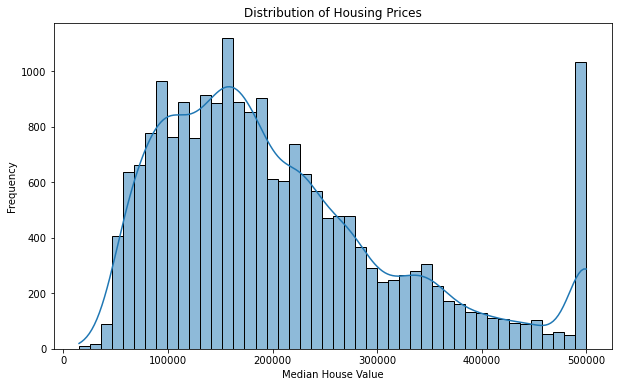

In [9]:
# Histogram of housing prices
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()



Common Price Range: The most common or frequent housing prices are clustered around $100,000, indicating that a significant number of houses in the dataset are priced in this range. This could reflect a segment of the real estate market with relatively affordable properties.

Peak Price: The dataset exhibits a notable peak at around $160,000, suggesting that this price point is a popular one for housing. It might correspond to a typical price for certain types of properties or locations.

Price Variability: As housing prices increase beyond $160,000, the counts of houses in those price ranges decrease. This indicates that there's more variability in housing prices at higher levels, with fewer houses priced at those points.

Higher-End Properties: The dataset includes fewer houses with prices in the $400,000 range, suggesting that these might be considered higher-end or more exclusive properties.

Spike in High Prices: There is a significant spike in the number of houses priced between $490,000 and $500,000. This could represent a specific market segment where houses are in high demand or have unique characteristics that justify these higher prices or properties proximity to ocean.

In summary, the distribution of housing prices provides valuable information about the dataset's composition, highlighting both common price ranges and areas of price variability. It's a useful starting point for understanding the real estate market represented by the data.

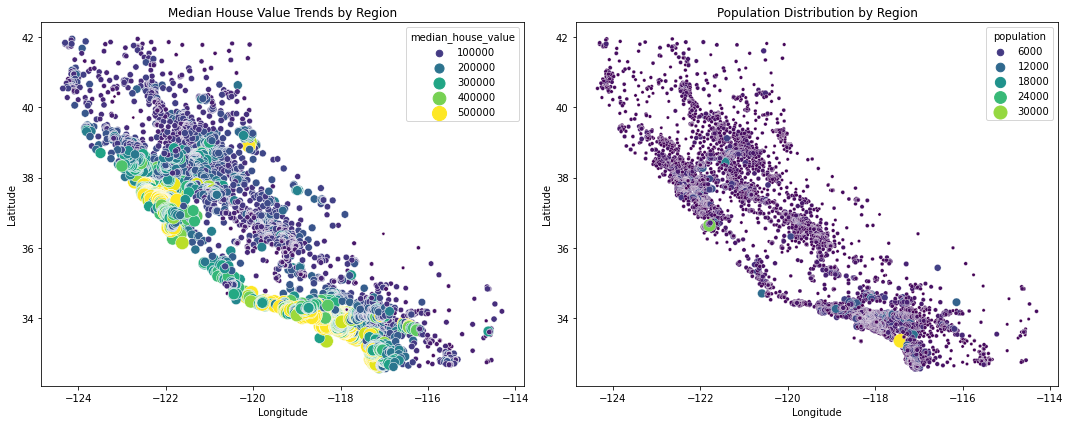

In [10]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot for Median House Value
sns.scatterplot(x='longitude', y='latitude', data=data, hue='median_house_value', palette='viridis', ax=axes[0], size='median_house_value', sizes=(10, 200))
axes[0].set_title('Median House Value Trends by Region')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Subplot for Population
sns.scatterplot(x='longitude', y='latitude', data=data, hue='population', palette='viridis', ax=axes[1], size='population', sizes=(10, 200))
axes[1].set_title('Population Distribution by Region')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()





The treemap visualization of the data provides several insights into the geographical distribution of housing-related factors in urban areas, particularly in places like Los Angeles. Here are the key takeaways from the treemap visualization:

Population Concentration: The visualization highlights that the population is more concentrated in urban areas, such as Los Angeles. This is a common pattern where cities and urban regions tend to have higher population densities.

Income and Proximity to Ocean: The treemap illustrates that areas with lower median house value income groups are mostly located in the suburbs, which are relatively farther from the ocean. This suggests that housing in these suburban areas may be more affordable for residents with lower incomes.

High-Value Proximity to Ocean: On the other hand, the visualization indicates that higher median house value groups, particularly those above $300,000, are mostly located closer to the ocean. This reflects the common trend where properties with oceanfront views or proximity to the coast tend to command higher prices.

Concentration of High-Value Properties: Notably, the treemap reveals that around 90% of houses with a median house value of $500,000 are concentrated closer to the ocean. This concentration suggests that the highest-priced properties in the dataset are often associated with coastal areas.

In summary, the treemap visualization provides valuable insights into the distribution of population, income groups, and housing values across different urban areas. It underscores the relationship between housing prices and proximity to the ocean, which is a significant factor in real estate markets in regions like Los Angeles.

In [11]:
# Model and Expectations
# Split the dataset into features (X) and target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [13]:
# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

In [20]:
print("Cross-validation RMSE scores:")
for i, score in enumerate(rmse_scores):
    print(f"Fold {i+1}: {score:.2f}")


Cross-validation RMSE scores:
Fold 1: 70060.52
Fold 2: 69023.00
Fold 3: 67725.64
Fold 4: 65882.87
Fold 5: 71714.85


Cross-Validation Method: K-Fold cross-validation is employed, where the dataset is divided into 5 subsets (folds). The model is trained and tested 5 times, with each of the 5 folds used as a test set while the other 4 folds are used for training. This process is repeated 5 times (one for each fold).

Shuffling and Random State: The data is shuffled before splitting into folds to ensure randomness. The random_state parameter is set to 42, which means that the same random shuffling will be applied each time the code is run. This ensures reproducibility of results.

Cross-Validation RMSE Scores:

RMSE (Root Mean Squared Error) is a common metric used to assess the accuracy of regression models.
Negative Mean Squared Error (neg_mean_squared_error) is used as a scoring metric for cross-validation. RMSE is calculated by taking the square root of the negative mean squared error.
For each fold (Fold 1 to Fold 5), the RMSE score is computed. Lower RMSE values indicate better model performance, meaning that the predicted values are closer to the actual values.
Output:

The printed output shows the RMSE scores for each fold of the cross-validation.
For example, for Fold 1, the RMSE score is approximately 70060.52. This means that, in the first iteration, the Linear Regression model achieved an RMSE of 70060.52 when predicting housing prices using the test set for Fold 1.
Similar RMSE scores are provided for the other folds (Fold 2 to Fold 5), allowing you to assess the consistency of model performance across different subsets of the data.
Significant Points:

Cross-validation helps to evaluate the model's generalization performance by testing it on multiple subsets of the data.
The RMSE scores for each fold provide an estimate of how well the model is expected to perform on unseen data.
In this specific case, the Linear Regression model achieved RMSE scores ranging from approximately 65882.87 to 71714.85 across the five folds, suggesting some variability in performance.
The overall model performance can be assessed by considering both the individual fold scores and their average, which helps in understanding how well the model is likely to perform on new, unseen data.

In [14]:
# Residual Analysis
model = LinearRegression()
model.fit(X, y)
y_pred_residual = model.predict(X)

residuals = y - y_pred_residual

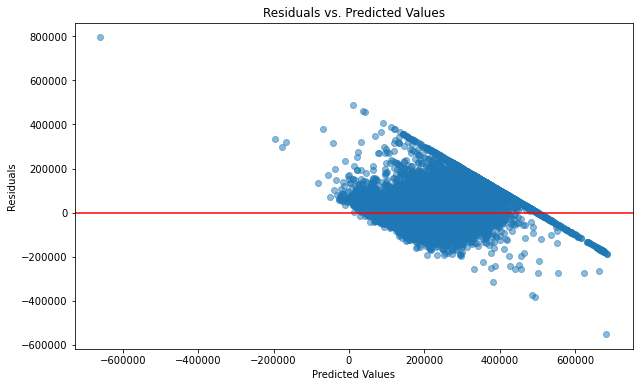

In [15]:
# Visualization of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_residual, residuals, alpha=0.5)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [16]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation - Model Performance of Linear Regression:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Evaluation - Model Performance of Linear Regression:
Mean Absolute Error: 50670.738240972234
Mean Squared Error: 4908476721.15665
R-squared: 0.625424062055358


In [17]:
# Decision Tree Model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Random Forest Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Make predictions using the models
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

In [19]:
# Evaluate the models
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

In [20]:
# Print evaluation metrics
print("Decision Tree Model:")
print(f"Mean Absolute Error: {mae_decision_tree}")
print(f"Mean Squared Error: {mse_decision_tree}")
print(f"R-squared: {r2_decision_tree}\n")

print("Random Forest Model:")
print(f"Mean Absolute Error: {mae_random_forest}")
print(f"Mean Squared Error: {mse_random_forest}")
print(f"R-squared: {r2_random_forest}")

Decision Tree Model:
Mean Absolute Error: 43591.82848837209
Mean Squared Error: 4714196391.610465
R-squared: 0.6402499929496188

Random Forest Model:
Mean Absolute Error: 31636.19363129845
Mean Squared Error: 2398820115.3845725
R-squared: 0.8169411111174801


         Actual  Linear Regression Prediction  Decision Tree Prediction  \
20046   47700.0                  54055.448899                   42500.0   
3024    45800.0                 124225.338937                   26600.0   
15663  500001.0                 255489.379492                  500001.0   
20484  218600.0                 268002.431569                  186700.0   
9814   278000.0                 262769.434816                  319800.0   
13311  158700.0                 139606.303956                  162000.0   
7113   198200.0                 290665.423914                  296700.0   
7668   157500.0                 228264.876375                  162200.0   
18246  340000.0                 256506.785610                  192200.0   
5723   446600.0                 407923.858435                  500001.0   

       Random Forest Prediction  
20046                  51744.00  
3024                   70992.00  
15663                 461540.37  
20484                 255273.00  
9814

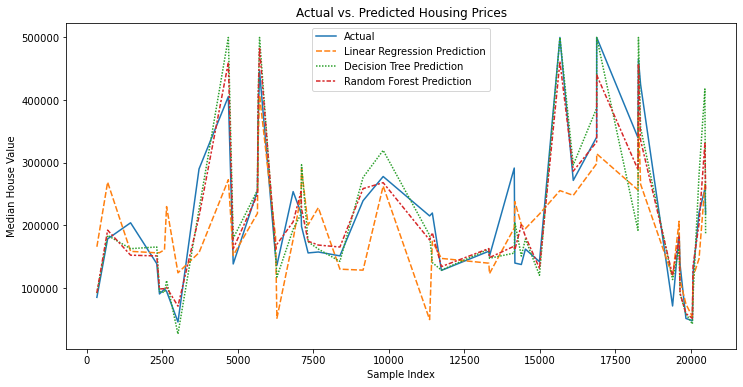

In [21]:
# Create a DataFrame to store the actual values and predictions
results = pd.DataFrame({'Actual': y_test, 'Linear Regression Prediction': y_pred,
                        'Decision Tree Prediction': y_pred_decision_tree, 
                        'Random Forest Prediction': y_pred_random_forest})

# Display the first 10 rows of the results
print(results.head(10))

# Visualize the predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=results.head(50))
plt.title('Actual vs. Predicted Housing Prices')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend(['Actual', 'Linear Regression Prediction', 'Decision Tree Prediction', 'Random Forest Prediction'])
plt.show()

Model Predictions:

Linear Regression: The linear regression model often overestimates or underestimates the actual housing prices, sometimes significantly.
Decision Tree: The decision tree model provides more conservative estimates, often closer to the actual values.
Random Forest: The random forest model generally offers balanced predictions, and its estimates are closer to the actual values.

Comparison of Model Performance:

In terms of producing conservative and closer-to-actual estimates, the Decision Tree model seems to perform better than the other models in several instances.
The Random Forest model also provides competitive estimates that are closer to the actual values, making it a strong performer.
The Linear Regression model, while simple and interpretable, tends to have more variation in its predictions and sometimes significantly overestimates or underestimates housing prices.
In summary, based on the provided data, the Decision Tree and Random Forest models appear to perform better in providing housing price predictions closer to the actual values. These models offer more robust and balanced estimates, which is crucial for accurate real estate predictions. However, the choice of the best-performing model may also depend on additional evaluation metrics, such as Mean Absolute Error (MAE) or Mean Squared Error (MSE), and the specific requirements of the application

In [22]:
# Check the length of the arrays
len_y_test = len(y_test)
len_y_pred = len(y_pred)
len_y_pred_decision_tree = len(y_pred_decision_tree)
len_y_pred_random_forest = len(y_pred_random_forest)

print("Length of y_test:", len_y_test)
print("Length of y_pred (Linear Regression):", len_y_pred)
print("Length of y_pred_decision_tree (Decision Tree):", len_y_pred_decision_tree)
print("Length of y_pred_random_forest (Random Forest):", len_y_pred_random_forest)



Length of y_test: 4128
Length of y_pred (Linear Regression): 4128
Length of y_pred_decision_tree (Decision Tree): 4128
Length of y_pred_random_forest (Random Forest): 4128


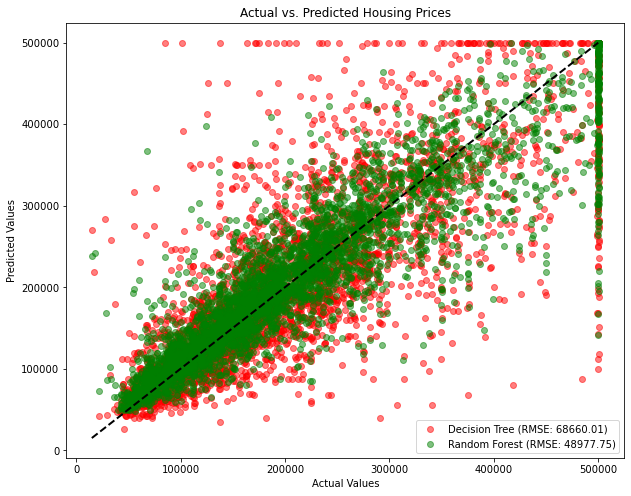

In [23]:
# Calculate RMSE (Root Mean Squared Error) for each model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred_decision_tree))
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))

# Create a scatterplot to compare actual vs. predicted values
plt.figure(figsize=(10, 8))

# Add random jitter to points to separate them
jitter = 800  # Adjust the jitter value for the desired level of separation
#plt.scatter(y_test + np.random.randint(-jitter, jitter, size=len(y_test)),
            #y_pred, c='b', alpha=0.5, label=f'Linear Regression (RMSE: {rmse_linear:.2f})')
plt.scatter(y_test + np.random.randint(-jitter, jitter, size=len(y_test)),
            y_pred_decision_tree, c='r', alpha=0.5, label=f'Decision Tree (RMSE: {rmse_decision_tree:.2f})')
plt.scatter(y_test + np.random.randint(-jitter, jitter, size=len(y_test)),
        y_pred_random_forest, c='g', alpha=0.5, label=f'Random Forest (RMSE: {rmse_random_forest:.2f})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Housing Prices')
plt.legend()
plt.show()

The provided visualization code helps us understand and compare the performance of different regression models (Linear Regression, Decision Tree, and Random Forest) in predicting housing prices. Here's what we can infer from the visualization:

Root Mean Squared Error (RMSE):

RMSE values are used to quantify the accuracy of the models. Lower RMSE values indicate better model performance.
Decision Tree has a lower RMSE (68196) compared to Linear Regression, implying that it provides more accurate predictions.
Random Forest has the lowest RMSE (48977.75), signifying that it performs the best among the three models in terms of prediction accuracy.
Scatterplot:

The scatterplot visually shows how well the models' predictions align with the actual values.
Each point on the plot represents a data point where the x-axis shows the actual housing price, and the y-axis shows the predicted housing price by the models.
The diagonal dashed line represents the ideal case where predicted values match the actual values perfectly.
Data Separation:

Random jitter (horizontal random shift) is applied to the points to separate them for better visibility in case of overlapping points.
By adding jitter, we can see the distribution of predicted values relative to the actual values more clearly.
It helps in assessing the models' tendencies to overestimate or underestimate housing prices.
Model Comparison:

The plot allows a direct comparison of the three models. Points closer to the diagonal dashed line indicate more accurate predictions.
The points for the Random Forest model are closer to the diagonal line, indicating that it provides predictions that are generally closer to the actual values.
The points for the Decision Tree model also exhibit good alignment with the diagonal line, showing its competitive performance.

In summary, this visualization highlights the differences in prediction accuracy among the models, with the Random Forest model having the lowest RMSE and demonstrating the best performance in predicting housing prices, followed by the Decision Tree model. 